<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Banking_Dataset_Classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#installing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df = pd.read_csv('/content/new_test.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [3]:
#SUMMARIZING THE DATASET
print(df.shape)

(8238, 13)


In [4]:
#PRE-PROCESSING THE DATASET
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [5]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')


In [9]:
#Seperating the input and output data
X = df.drop('poutcome', axis=1)
y = df['poutcome']

In [10]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [32]:
# Taking the predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [33]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.8634708737864077
Precision: 0.7455819498774624
Recall: 0.8634708737864077
F1 Score: 0.8002077846942743


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Model Evaluation
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_train, y_train_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.8685887708649469
Precision: 0.7544464528726792
Recall: 0.8685887708649469
F1 Score: 0.8075039994203275


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
#Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#Train Logistic Regression with Balanced Class Weights
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [42]:
#Predict
y_pred = model.predict(X_test_scaled)

In [47]:
#Evaluation Metrics
print("Accuracy test score:", accuracy_score(y_test, y_pred))
print("Precision test score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall test score:", recall_score(y_test, y_pred, average='weighted'))
print("nF1 test score:", f1_score(y_test, y_pred, average='weighted'))

print("\nAccuracy train score:", accuracy_score(y_train, y_train_pred))
print("Precision train score:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall train score:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 train score:", f1_score(y_train, y_train_pred, average='weighted'))

Accuracy test score: 0.5661407766990292
Precision test score: 0.8502075201855924
Recall test score: 0.5661407766990292
nF1 test score: 0.658061012566484

Accuracy train score: 0.8685887708649469
Precision train score: 0.7544464528726792
Recall train score: 0.8685887708649469
F1 train score: 0.8075039994203275


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[ 85  31  66]
 [307 825 291]
 [ 13   7  23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.47      0.29       182
           1       0.96      0.58      0.72      1423
           2       0.06      0.53      0.11        43

    accuracy                           0.57      1648
   macro avg       0.41      0.53      0.37      1648
weighted avg       0.85      0.57      0.66      1648



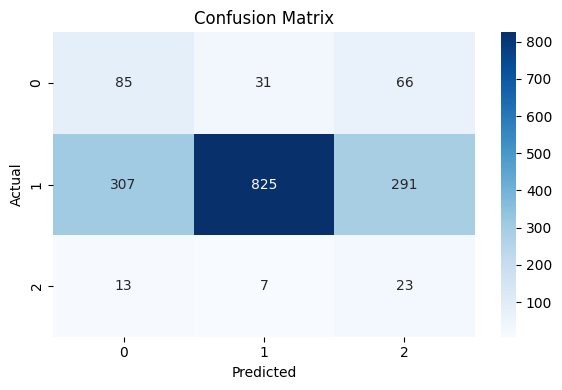

In [48]:
#Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()